In [9]:
import os

# data frame manipulation
import numpy as np
import pandas as pd
from collections import defaultdict

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# models
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from boruta import BorutaPy

In [2]:
os.chdir('C:/Users/jsbae/410project/data')
df = pd.DataFrame(pd.read_csv('Life Expectancy Data.csv'))

In [5]:
df.describe()

# this lists the percentage of null values that make up each column
# df.isnull().sum() * 100 / df.isnull().count()
# df.count()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [3]:
# One-hot encode the data using pandas get_dummies
# features = pd.get_dummies(features)

def clean_data(df):
    df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                       "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                      "Measles ":"Measles", "under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                      " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                       "Total expenditure":"Tot_Exp"},inplace=True)
    df.fillna(df.median(), inplace=True)
    # without status and country name
    df.drop(columns=['Country', 'Status'], inplace=True)
    return df

In [100]:
def pairplots(df):
    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['Adult_Mortality', 'Infant_Deaths', 'Population', 'Schooling'])
    plt.savefig('scaled_all_demo.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['HepatitisB', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS'])
    plt.savefig('scaled_all_vaccine.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['GDP', 'Tot_Exp', 'Income_Comp_Of_Resources', 'Percentage_Exp'])
    plt.savefig('scaled_all_economic.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['Alcohol', 'thinness_1to19_years', 'thinness_5to9_years', 'Under_Five_Deaths', 'BMI'])
    plt.savefig('scaled_all_other.png')

In [4]:
cleaned_df = clean_data(df)

# Create the Scaler object
scaler = preprocessing.StandardScaler()

def scale_data(df):
    col_names = df.columns
    # Fit your data on the scaler object
    scaled_df = scaler.fit_transform(cleaned_df)
    scaled_df = pd.DataFrame(scaled_df, columns=col_names)
    return scaled_df

# It seems because of the large difference in scales and units, standardizing is a better transformation for this data set.

In [23]:
"""
From the graphs, I notice a few variables that stand out:
Negatively correlated: Infant deaths, HIV, thinness (both), under five deaths
Positively correlated: Schooling, GDP(?), income composition of resources, BMI
"""

'\nFrom the graphs, I notice a few variables that stand out:\nNegatively correlated: Infant deaths, HIV, thinness (both), under five deaths\nPositively correlated: Schooling, GDP(?), income composition of resources, BMI\n'

In [8]:
# use pearson's r to get correlation
# scipy.stats.pearsonr(x, y)


# spearman doesn't assume normal dist
def compute_spearman(df):
    correlation_coeff = list()
    for variable in df.columns:
        _, p_val = sp.stats.spearmanr(df[variable], df['Life_Expectancy'])
        correlation_coeff.append([variable, p_val])
    return sorted(correlation_coeff, key=lambda x: x[1])


In [9]:
# they equal each other
# spearman_scaled = compute_spearman(scaled_df)

# for i in range(len(spearman_scaled)):
 #    print(spearman_scaled[i])

['Life_Expectancy', 0.0]
['Adult_Mortality', 0.0]
['HIV/AIDS', 0.0]
['Income_Comp_Of_Resources', 0.0]
['Schooling', 0.0]
['Under_Five_Deaths', 2.6695542748012934e-307]
['thinness_5to9_years', 7.032608379546386e-303]
['thinness_1to19_years', 1.781172273000317e-290]
['Infant_Deaths', 1.5653857025847495e-285]
['GDP', 6.797666125765049e-284]
['BMI', 3.402487976762176e-264]
['Diphtheria', 8.833823641765406e-223]
['Polio', 8.599712546571468e-214]
['Percentage_Exp', 9.272480904123952e-131]
['Alcohol', 9.470443682045878e-129]
['HepatitisB', 3.1005806341938203e-61]
['Tot_Exp', 2.3710848234949152e-55]
['Measles', 2.9898347194712915e-54]
['Year', 1.3530297332773523e-17]
['Population', 9.73076421724408e-05]


In [10]:
scaled_df = scale_data(cleaned_df)
X = scaled_df.drop(columns=['Life_Expectancy'])
y = scaled_df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# ridge regression has the best performance of all
ridge_model = Ridge()
# lasso says nothing is significant (all weights are 0)
lasso_model = Lasso()
# elastic says only adult_mort, Income_Comp_Of_Resources, Schooling are important (which seems very likely)
elastic_model = ElasticNet()


# regular linear regression stuff
linear_model = LinearRegression()
fitted_linear = linear_model.fit(X_train, y_train)
print(fitted_linear.coef_)
results_linear = fitted_linear.predict(X_test)

fitted_ridge = ridge_model.fit(X_train, y_train)
fitted_lasso = lasso_model.fit(X_train, y_train)
fitted_elastic = elastic_model.fit(X_train, y_train)

results_ridge = fitted_ridge.predict(X_test)
results_lasso = fitted_lasso.predict(X_test)
results_elastic = fitted_elastic.predict(X_test)

# cross-validation fitted models
fitted_cross_ridge = RidgeCV(cv=5, alphas=[0.1, 0.5, 1.0, 5.0, 10.0]).fit(X_train, y_train)
fitted_cross_lasso = LassoCV(cv=5, alphas=[0.1, 0.5, 1.0, 5.0, 10.0]).fit(X_train, y_train)
fitted_cross_elastic = ElasticNetCV(cv=5, alphas=[0.1, 0.5, 1.0, 5.0, 10.0]).fit(X_train, y_train)

print(fitted_ridge.coef_)
print(fitted_lasso.coef_)
print(fitted_elastic.coef_)


cross_results_ridge = fitted_cross_ridge.predict(X_test)
cross_results_lasso = fitted_cross_lasso.predict(X_test)
cross_results_elastic = fitted_cross_elastic.predict(X_test)


[-5.52241470e-03 -2.59033256e-01  1.21940836e+00  5.11694404e-02
  2.37715427e-02 -4.44669149e-02 -2.16515082e-02  9.91630395e-02
 -1.23953180e+00  6.76867654e-02  2.13104510e-02  1.01493541e-01
 -2.57753164e-01  5.56744229e-02 -2.85537806e-03 -3.62001467e-02
  7.87755074e-05  1.29320314e-01  2.34030636e-01]
[-5.87623363e-03 -2.59631152e-01  1.06270665e+00  4.90733165e-02
  2.43641752e-02 -4.51639689e-02 -2.27760243e-02  9.95342322e-02
 -1.08289457e+00  6.88711450e-02  2.15762518e-02  1.03653014e-01
 -2.58516036e-01  5.44484213e-02 -1.69058446e-04 -3.66417869e-02
  1.69189466e-03  1.31356989e-01  2.34754409e-01]
[ 0. -0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.
  0.]
[ 0.         -0.08701352 -0.          0.          0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.05649971
  0.09139059]


In [15]:
def error_metrics(output):
    print('results')
    print("mean absolute":, metrics.mean_absolute_error(y_test, output))
    print("mean squared:", metrics.mean_squared_error(y_test, output))
    print("room mean squared:", np.sqrt(metrics.mean_squared_error(y_test, output)))
    print("r-squared:", metrics.r2_score(y_test, output))
all_results = [results_linear, results_ridge, results_lasso, results_elastic, cross_results_ridge, cross_results_lasso, cross_results_elastic]

for result in all_results:
    error_metrics(result)

# fitted vs. actual (seems pretty linear)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(100, 50))
fig.suptitle('Fitted vs. Actual')
ax1.scatter(results_ridge, y_test, s=1000) 
ax2.scatter(results_lasso, y_test, s=1000) 
ax3.scatter(results_elastic, y_test, s=1000) 
ax4.scatter(results_linear, y_test, s=1000) 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('Fitted vs. Actual (cross-validation)')
ax1.scatter(cross_results_ridge, y_test, s=1000) 
ax2.scatter(cross_results_lasso, y_test, s=1000) 
ax3.scatter(cross_results_elastic, y_test, s=1000) 


SyntaxError: invalid syntax (<ipython-input-15-3b16beb9af38>, line 3)

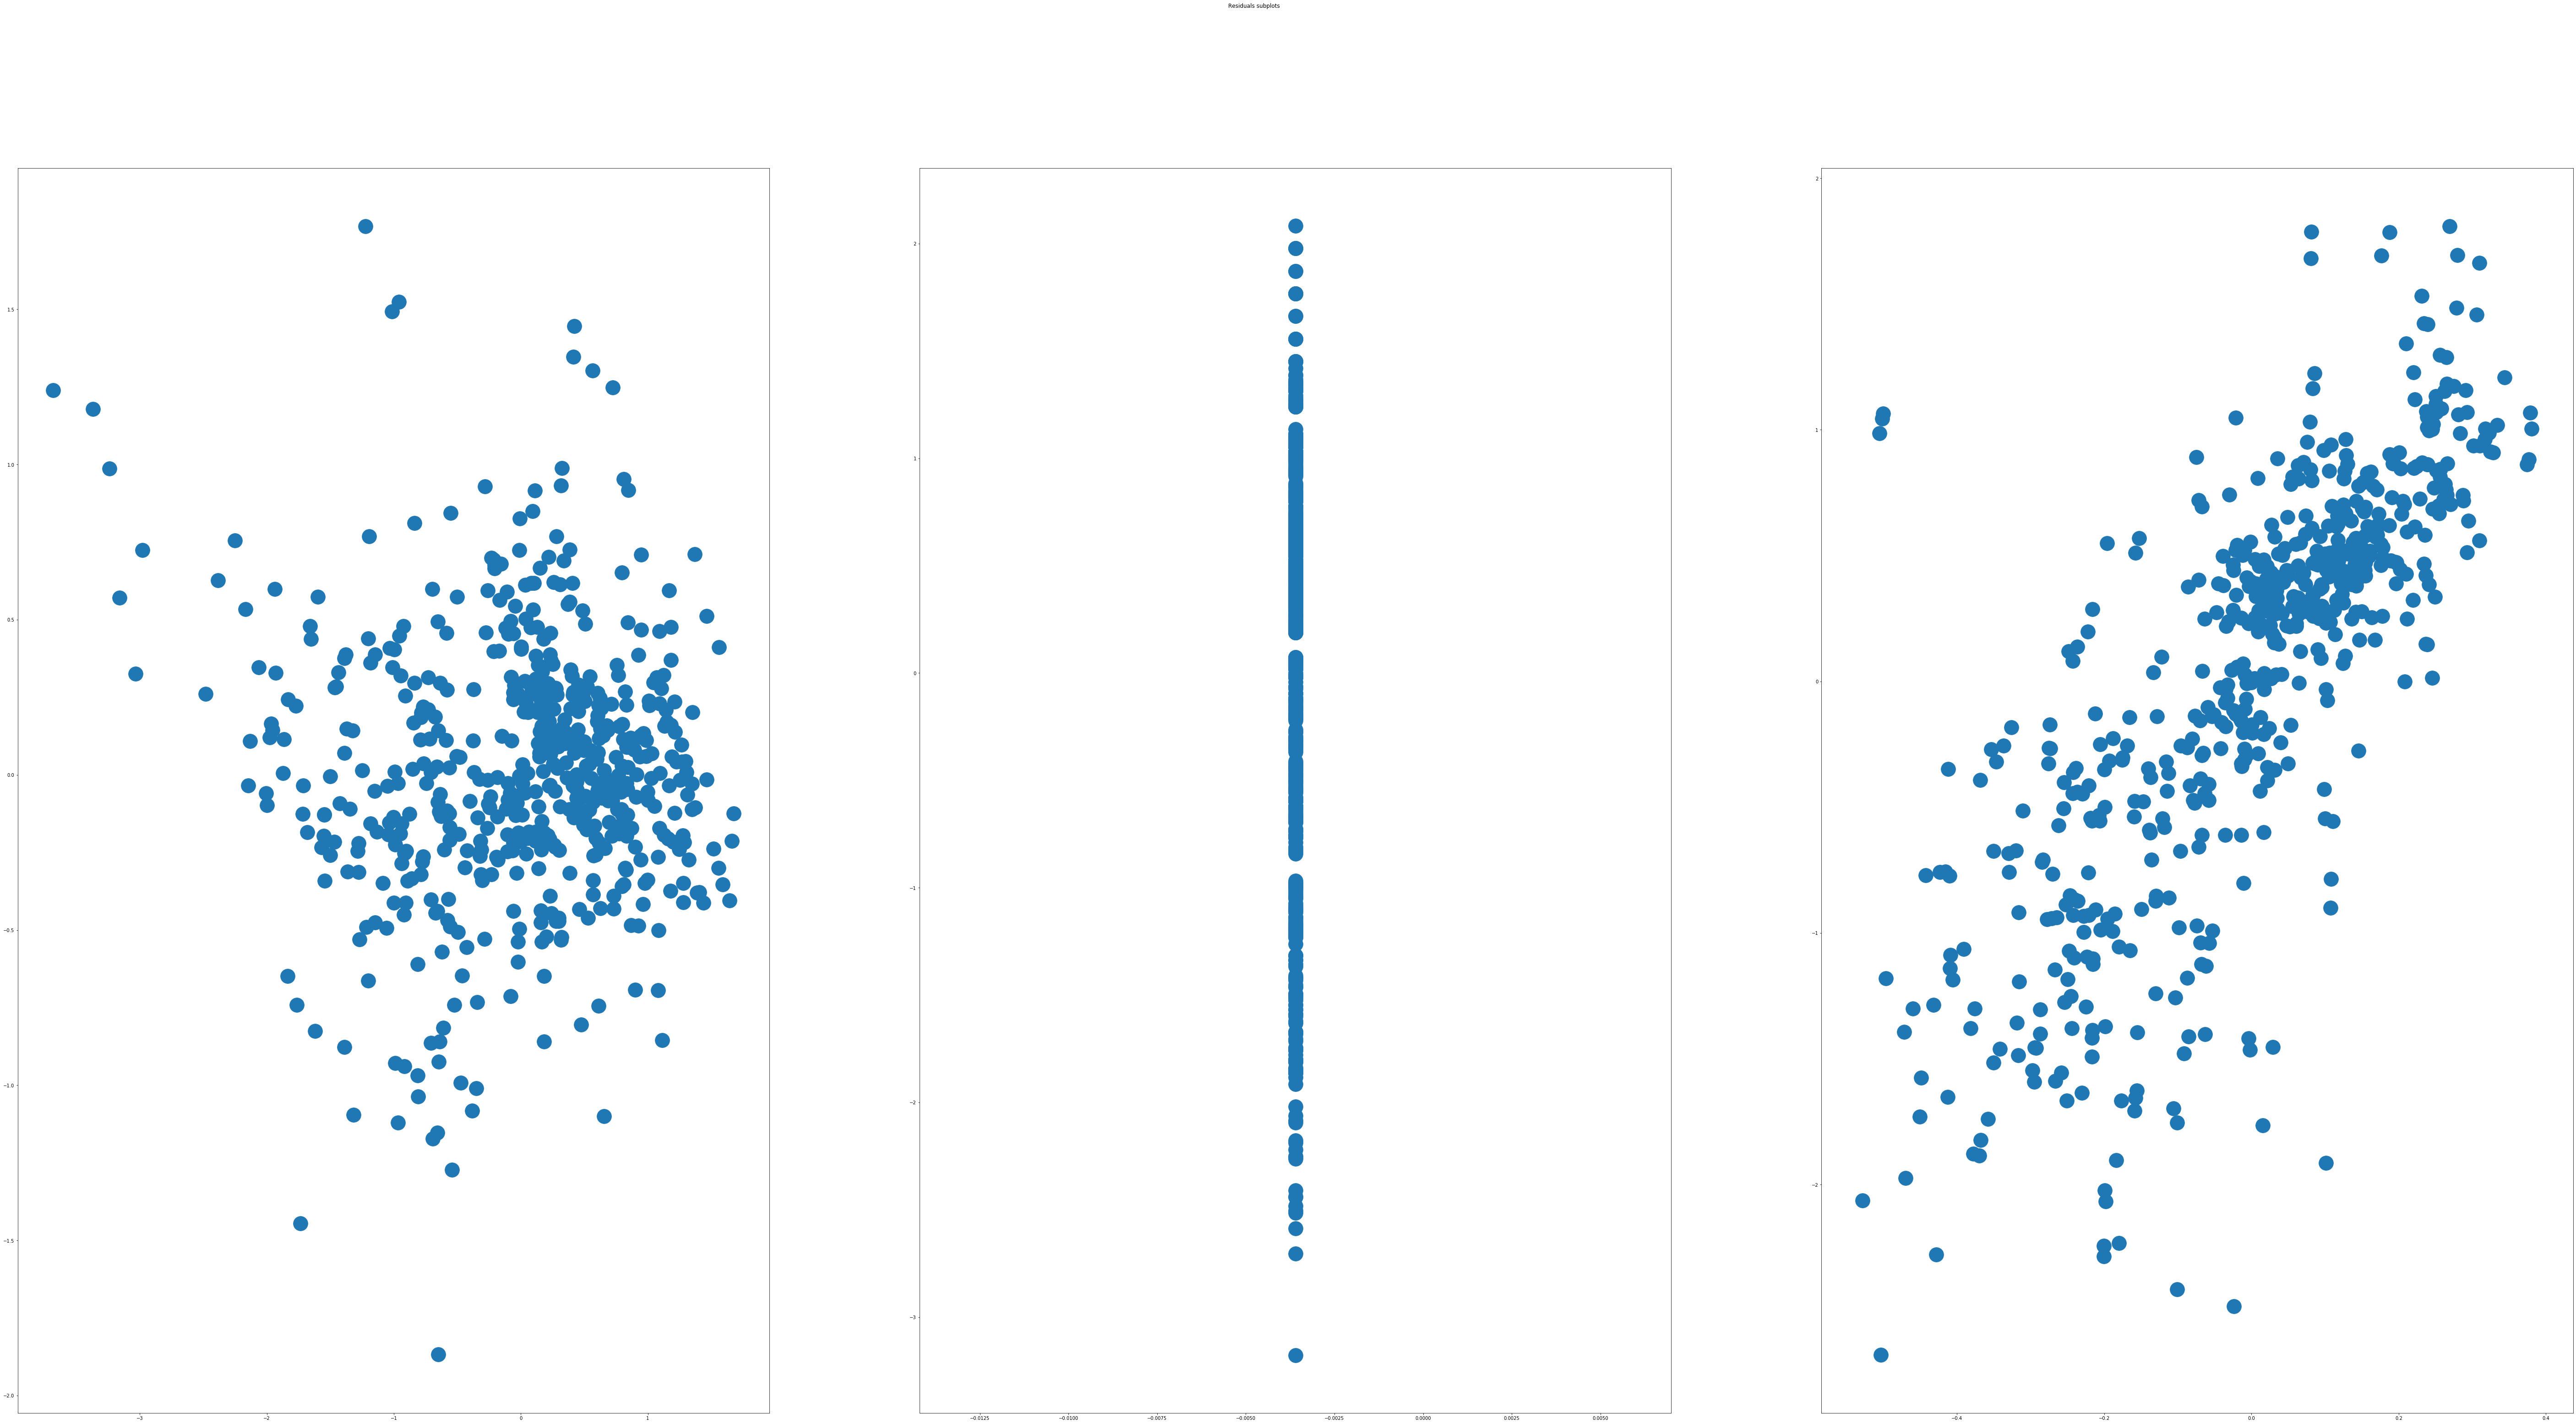

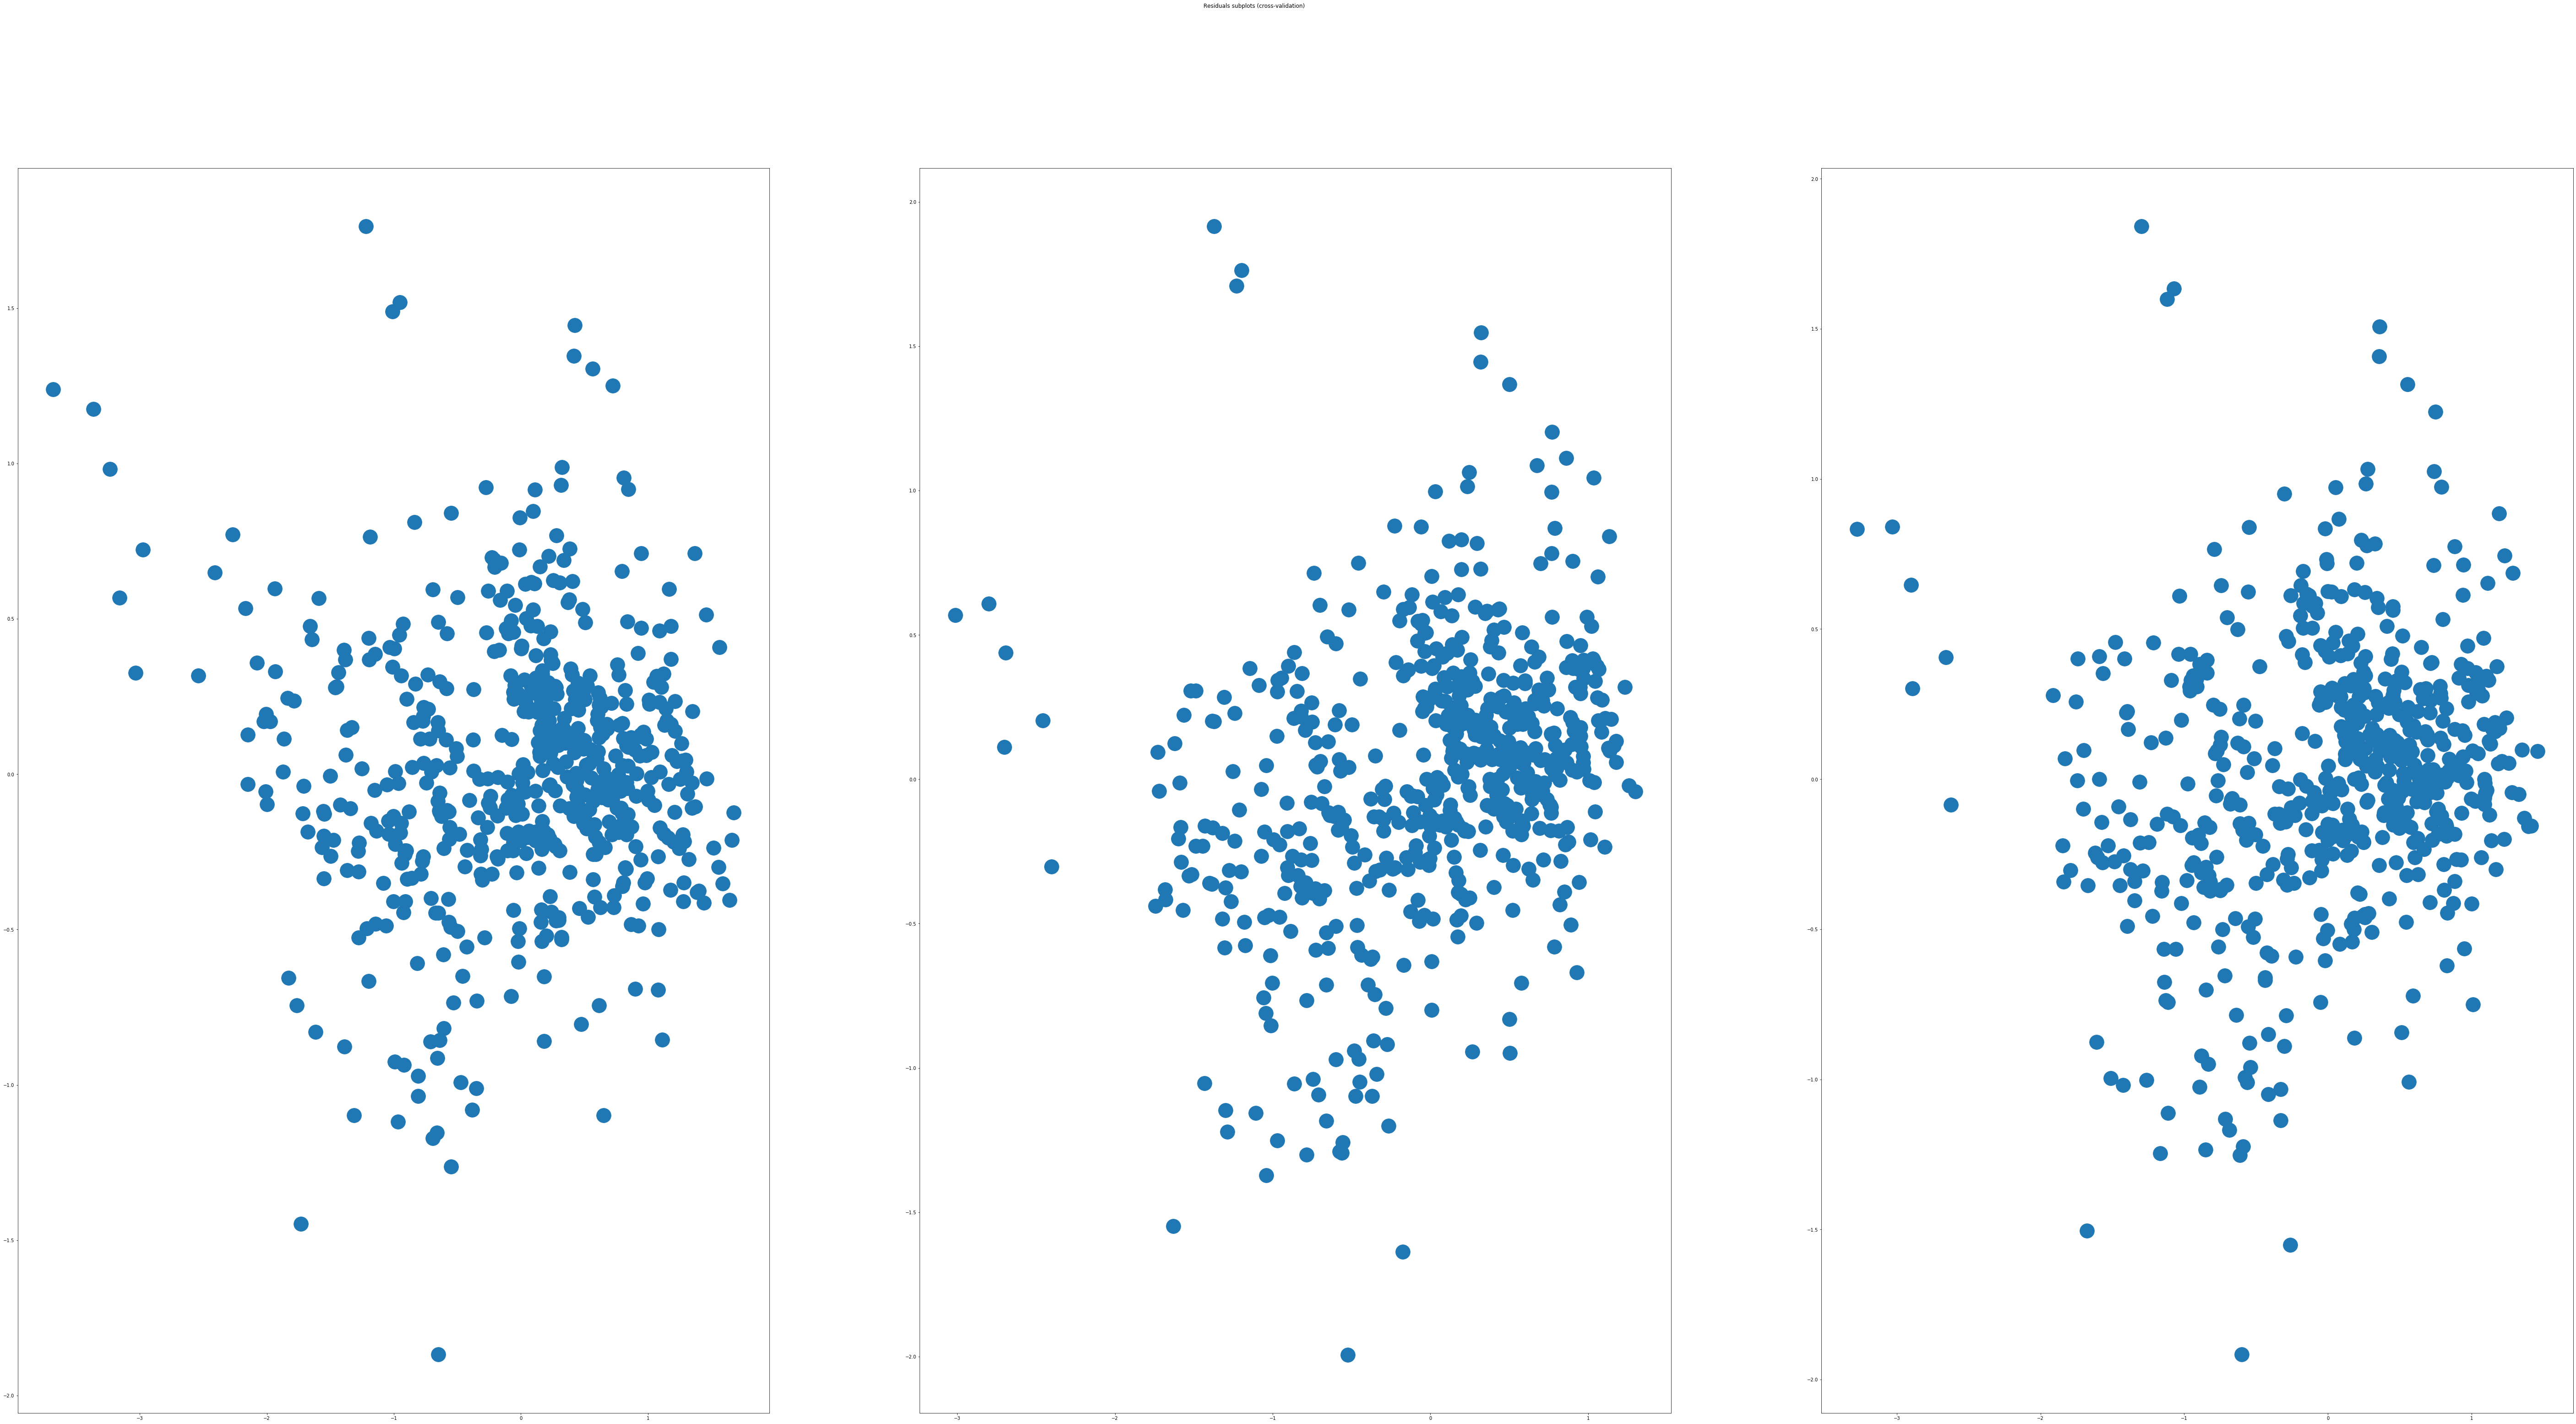

In [13]:
# residuals vs. fitted
ridge_residuals = y_test - results_ridge
lasso_residuals = y_test - results_lasso
elastic_residuals = y_test - results_elastic

cross_ridge_residuals = y_test - cross_results_ridge
cross_lasso_residuals = y_test - cross_results_lasso
cross_elastic_residuals = y_test - cross_results_elastic

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('Residuals subplots')
ax1.scatter(results_ridge, ridge_residuals, s=1000) 
ax2.scatter(results_lasso, lasso_residuals, s=1000) 
ax3.scatter(results_elastic, elastic_residuals, s=1000) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('Residuals subplots (cross-validation)')
ax1.scatter(cross_results_ridge, cross_ridge_residuals, s=1000) 
ax2.scatter(cross_results_lasso, cross_lasso_residuals, s=1000) 
ax3.scatter(cross_results_elastic, cross_elastic_residuals, s=1000) 

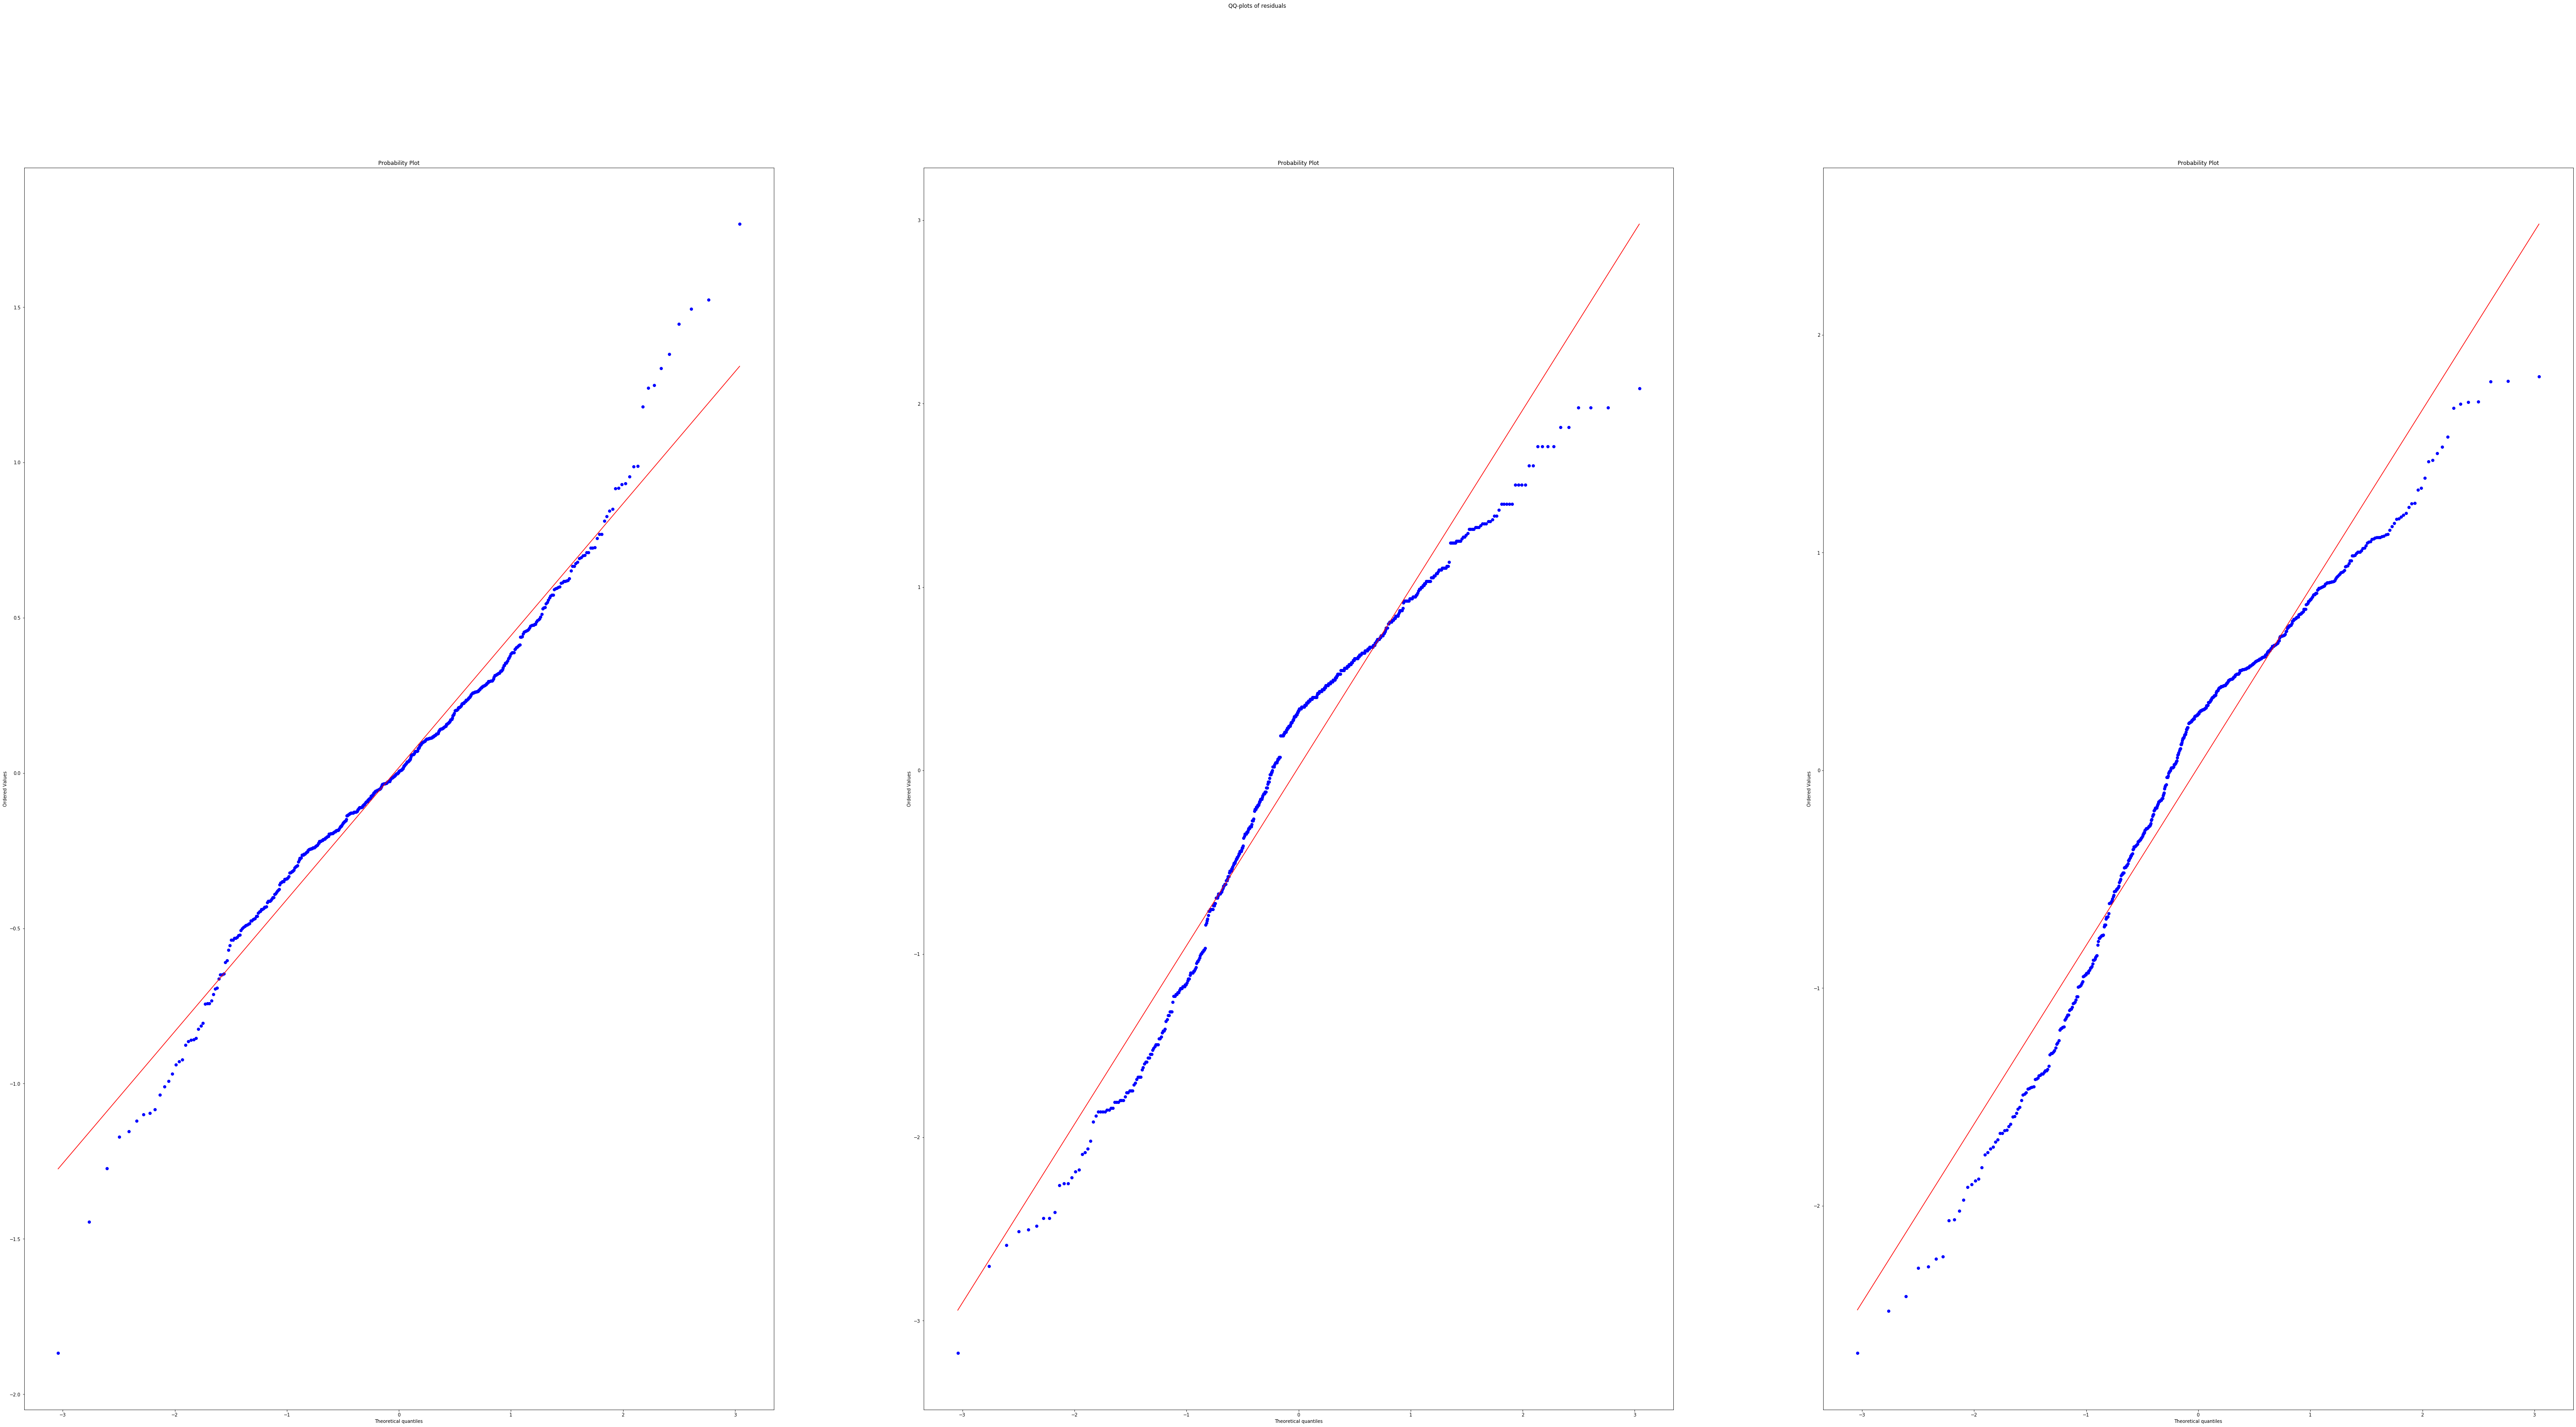

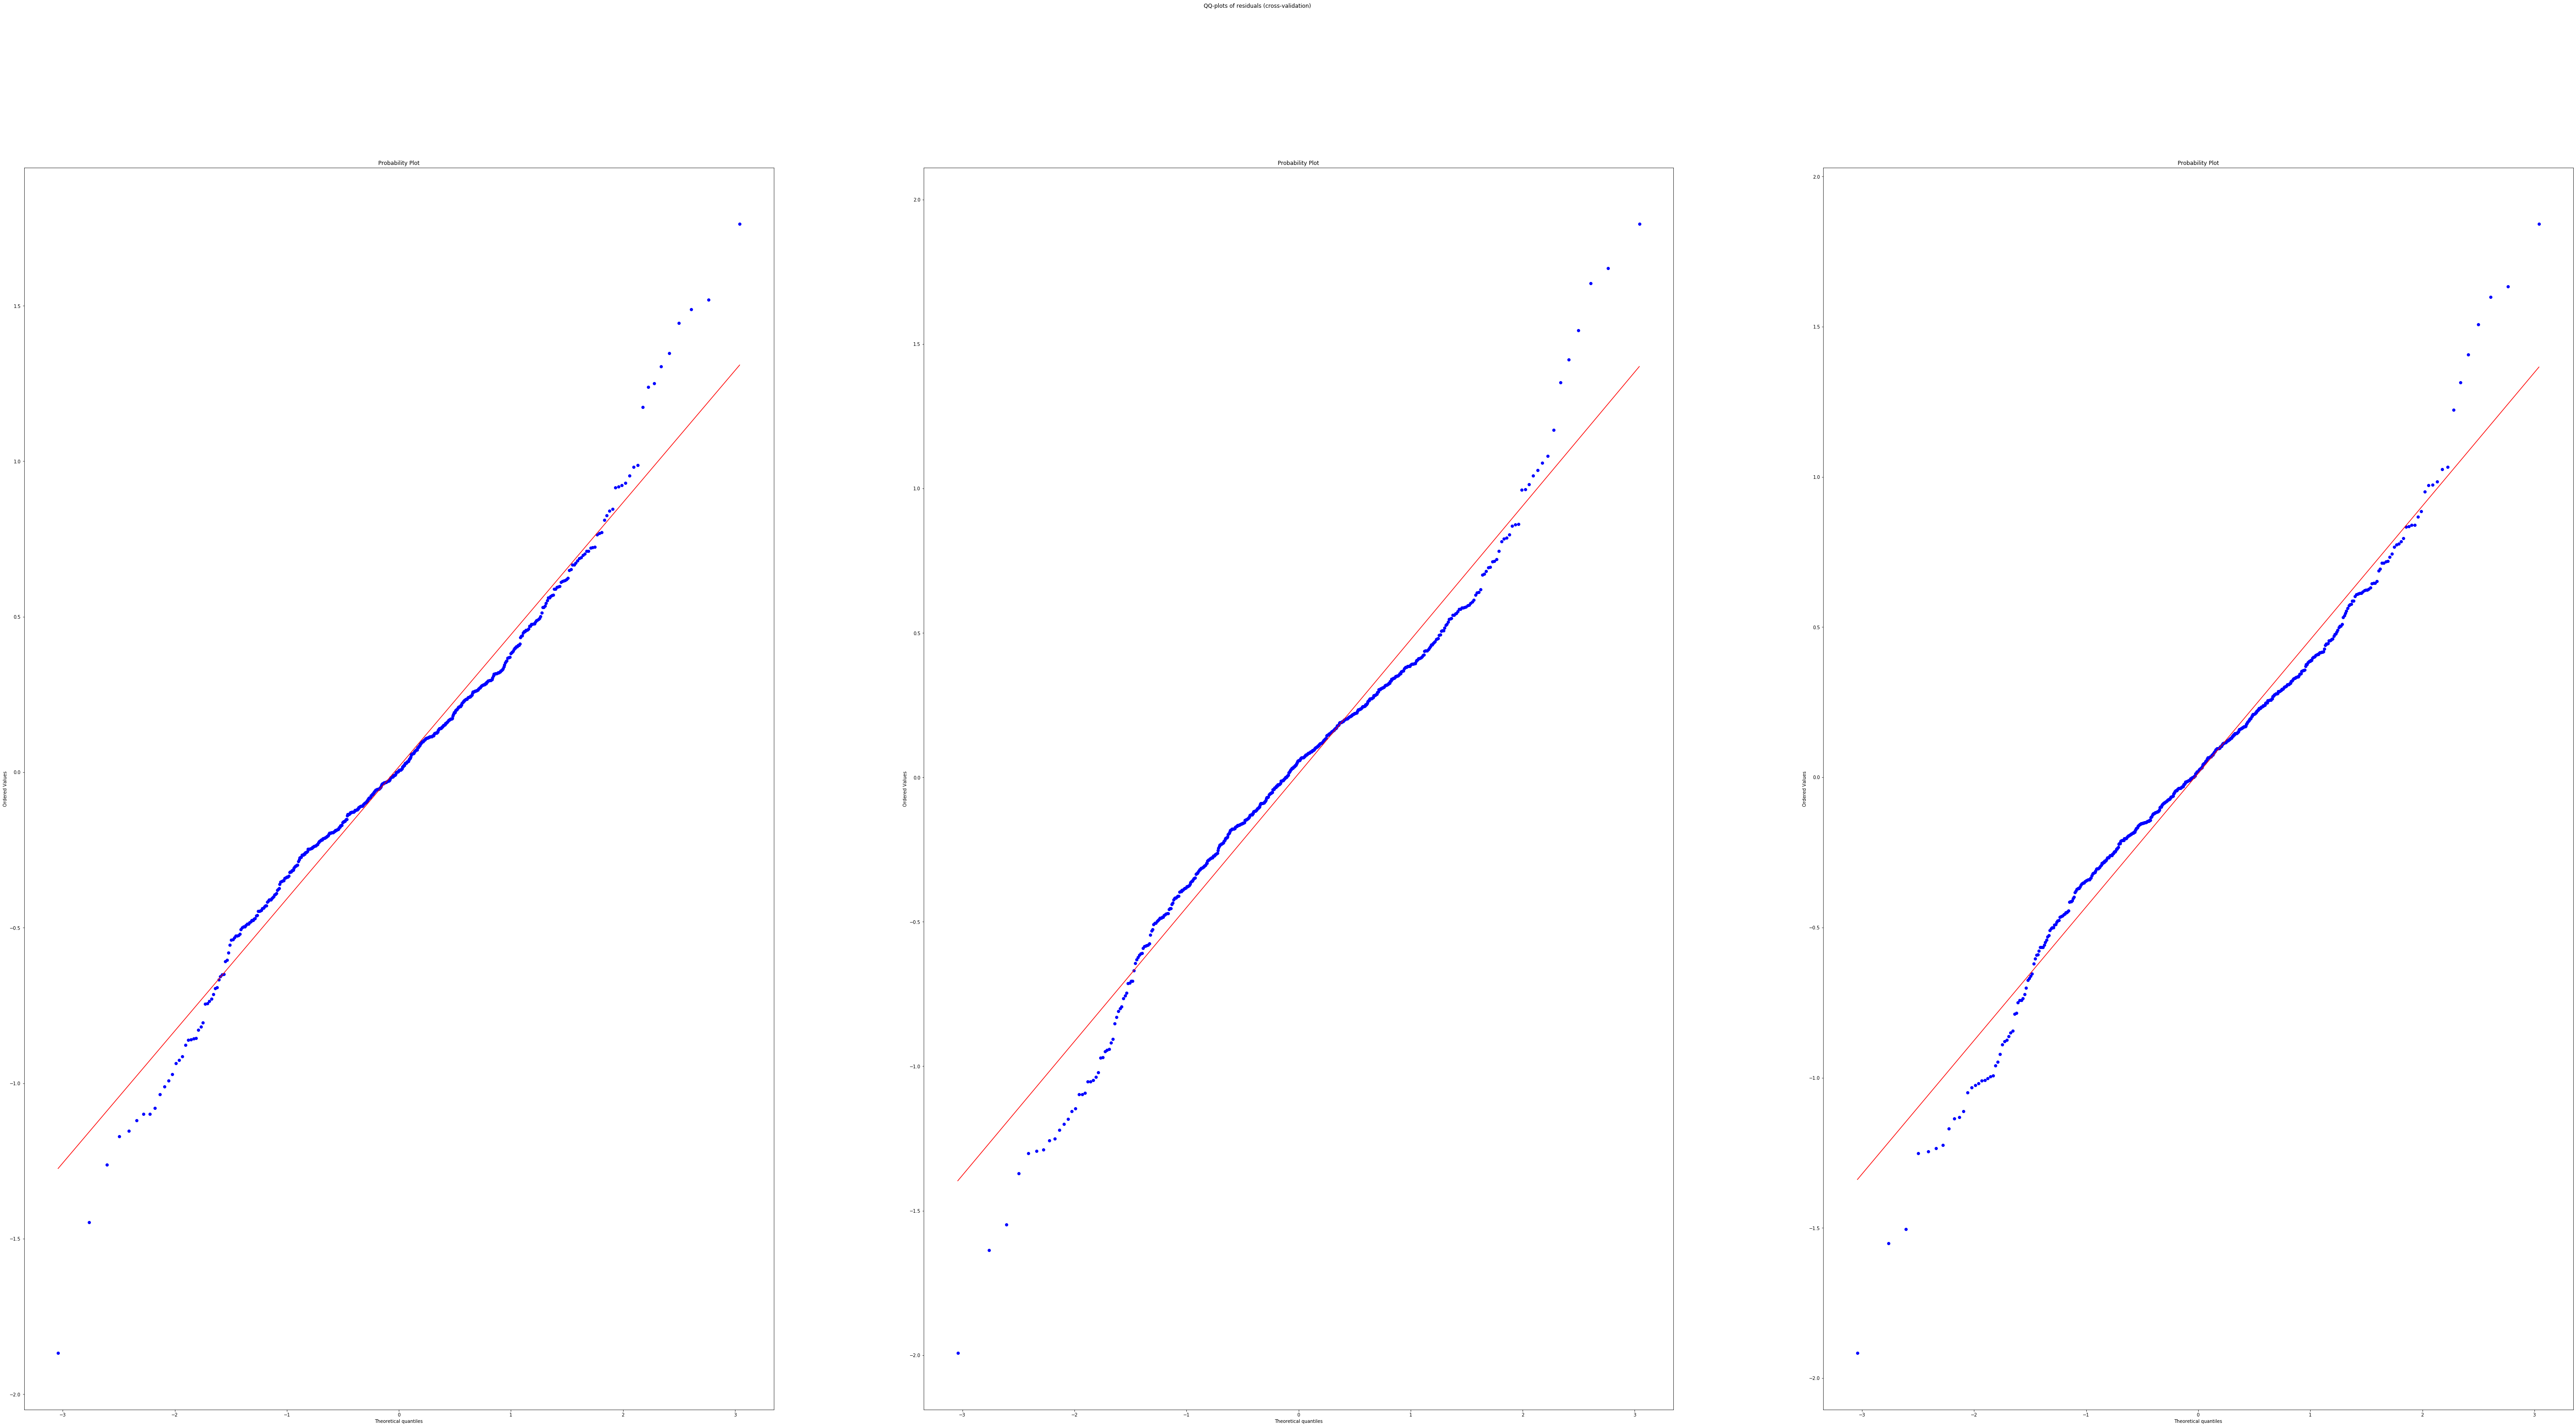

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('QQ-plots of residuals')
ax1 = plt.subplot(131)
stats.probplot(ridge_residuals, plot=plt)
ax2 = plt.subplot(132)
stats.probplot(lasso_residuals, plot=plt)
ax3 = plt.subplot(133)
stats.probplot(elastic_residuals, plot=plt)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('QQ-plots of residuals (cross-validation)')
ax1 = plt.subplot(131)
stats.probplot(cross_ridge_residuals, plot=plt)
ax2 = plt.subplot(132)
stats.probplot(cross_lasso_residuals, plot=plt)
ax3 = plt.subplot(133)
stats.probplot(cross_elastic_residuals, plot=plt)
plt.show()